# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan berjudul "Student Depression Dataset". Dataset ini memiliki
   
   - Sumber: Kaggle Adil Shamim: "Student Depression Dataset"

2. **Dataset Information**

   Dataset "Student Depression Dataset" adalah menghimpun berbagai informasi yang bertujuan untuk memahami, menganalisis, dan memprediksi tingkat depresi di kalangan mahasiswa atau pelajar. Terdapat 18 fitur pada dataset ini, yang terdiri dari  

| No | **Nama Kolom**                           | **Deskripsi**                                                                                                                                           |
|----|------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1  | `id`                                     | Identifier unik yang diberikan untuk setiap data mahasiswa dalam dataset.                                                                              |
| 2  | `Gender`                                 | Jenis kelamin mahasiswa (contoh: Male, Female, Other), digunakan untuk menganalisis tren kesehatan mental berdasarkan gender.                         |
| 3  | `Age`                                    | Usia mahasiswa dalam satuan tahun.                                                                                                                     |
| 4  | `City`                                   | Kota atau wilayah tempat tinggal mahasiswa, memberikan konteks geografis dalam analisis.                                                              |
| 5  | `Profession`                             | Bidang pekerjaan atau studi mahasiswa, yang dapat menunjukkan faktor stres akademik atau pekerjaan.                                                   |
| 6  | `Academic Pressure`                      | Ukuran tingkat tekanan akademik yang dialami mahasiswa, termasuk stres akibat ujian, tugas, dan tuntutan akademik.                                   |
| 7  | `Work Pressure`                          | Ukuran tekanan terkait pekerjaan bagi mahasiswa yang juga bekerja sambil belajar.                                                                     |
| 8  | `CGPA`                                   | Nilai rata-rata kumulatif mahasiswa, mencerminkan kinerja akademik secara keseluruhan.                                                                |
| 9  | `Study Satisfaction`                     | Indikator kepuasan mahasiswa terhadap studi yang dijalani, berkaitan dengan kesejahteraan mental.                                                     |
| 10 | `Job Satisfaction`                       | Ukuran kepuasan mahasiswa terhadap pekerjaan atau lingkungan kerja, jika ada.                                                                          |
| 11 | `Sleep Duration`                         | Rata-rata durasi tidur harian mahasiswa (dalam jam), faktor penting dalam kesehatan mental.                                                           |
| 12 | `Dietary Habits`                         | Penilaian terhadap pola makan dan kebiasaan nutrisi mahasiswa, yang dapat memengaruhi suasana hati dan kesehatan secara umum.                        |
| 13 | `Degree`                                 | Gelar akademik atau program studi yang sedang ditempuh mahasiswa.                                                                                      |
| 14 | `Have you ever had suicidal thoughts?`   | Indikator biner (Yes/No) yang menunjukkan apakah mahasiswa pernah memiliki pikiran untuk bunuh diri.                                                  |
| 15 | `Work/Study Hours`                       | Rata-rata jumlah jam per hari yang dihabiskan untuk bekerja atau belajar, yang bisa berdampak pada tingkat stres.                                     |
| 16 | `Financial Stress`                       | Ukuran tingkat stres yang dialami akibat permasalahan finansial, yang dapat memengaruhi kesehatan mental.                                            |
| 17 | `Family History of Mental Illness`       | Menunjukkan apakah ada riwayat gangguan mental dalam keluarga (Yes/No), faktor yang relevan dalam kecenderungan kesehatan mental.                    |
| 18 | `Depression`                             | Variabel target yang menunjukkan apakah mahasiswa mengalami depresi (Yes/No). Ini adalah fokus utama dalam analisis dataset.                         |


Bedasarkan Informasi dataset tersebut, berikut adalah pengelompokan (grup) variabel.

1. Informasi Demografis: Gender, Age, City, Profession, Degree
2. Faktor Akademik: Academic Pressure, CGPA, Study Satisfaction, Work/Study Hours
3. Faktor Pekerjaan: Work Pressure, Job Satisfaction
4. Faktor Gaya Hidup & Kesehatan: Sleep Duration, Dietary Habits
5. Faktor Psikososial: Financial Stress, Family History of Mental Illness, Have you ever had suicidal thoughts?
6. Target: Depression

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
df = pd.read_csv('../student_depression_dataset_raw.csv')

## Data Understanding

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20206 entries, 0 to 20205
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     20206 non-null  int64  
 1   Gender                                 20206 non-null  object 
 2   Age                                    20206 non-null  float64
 3   City                                   20206 non-null  object 
 4   Profession                             20206 non-null  object 
 5   Academic Pressure                      20206 non-null  float64
 6   Work Pressure                          20206 non-null  float64
 7   CGPA                                   20206 non-null  float64
 8   Study Satisfaction                     20205 non-null  float64
 9   Job Satisfaction                       20205 non-null  float64
 10  Sleep Duration                         20205 non-null  object 
 11  Di

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0.0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0.0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1.0
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0.0


In [ ]:
print(df.describe(include='all'))

                   id Gender           Age    City Profession  \
count    20206.000000  20206  20206.000000   20206      20206   
unique            NaN      2           NaN      46         12   
top               NaN   Male           NaN  Kalyan    Student   
freq              NaN  11271           NaN    1145      20187   
mean     51066.806988    NaN     25.805355     NaN        NaN   
std      29540.219987    NaN      4.896683     NaN        NaN   
min          2.000000    NaN     18.000000     NaN        NaN   
25%      25355.250000    NaN     21.000000     NaN        NaN   
50%      51073.500000    NaN     25.000000     NaN        NaN   
75%      76383.250000    NaN     30.000000     NaN        NaN   
max     102280.000000    NaN     59.000000     NaN        NaN   

        Academic Pressure  Work Pressure          CGPA  Study Satisfaction  \
count        20206.000000   20206.000000  20206.000000        20205.000000   
unique                NaN            NaN           NaN         

### Check Missing Values

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       1
Job Satisfaction                         1
Sleep Duration                           1
Dietary Habits                           1
Degree                                   1
Have you ever had suicidal thoughts ?    1
Work/Study Hours                         1
Financial Stress                         1
Family History of Mental Illness         1
Depression                               1
dtype: int64


### Check Duplicate Values

In [ ]:
num_duplicates = df.duplicated().sum()
percent_duplicates = (num_duplicates / len(df)) * 100

print(f"Jumlah data duplikat: {num_duplicates}")
print(f"Persentase data duplikat: {percent_duplicates:.2f}%")

Jumlah data duplikat: 0
Persentase data duplikat: 0.00%


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Distribusi Umur**

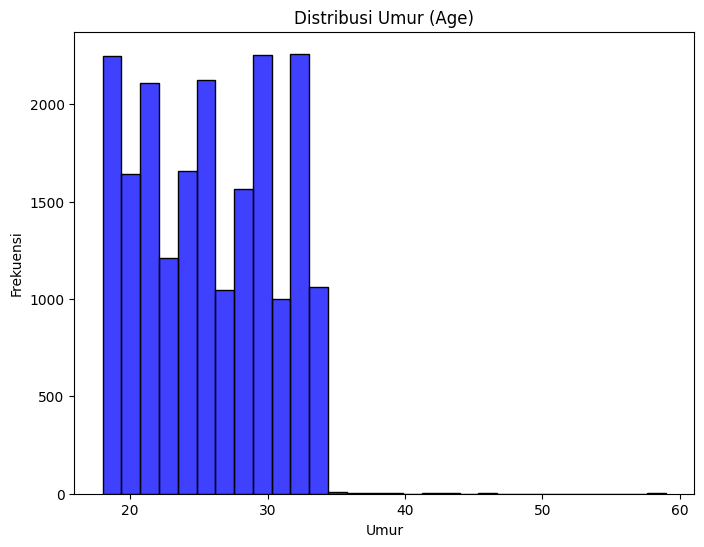

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, color='blue')
plt.title('Distribusi Umur (Age)')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

## **Distribusi Nilai Rata-rata Kumulatif Mahasiswa (CGPA)**

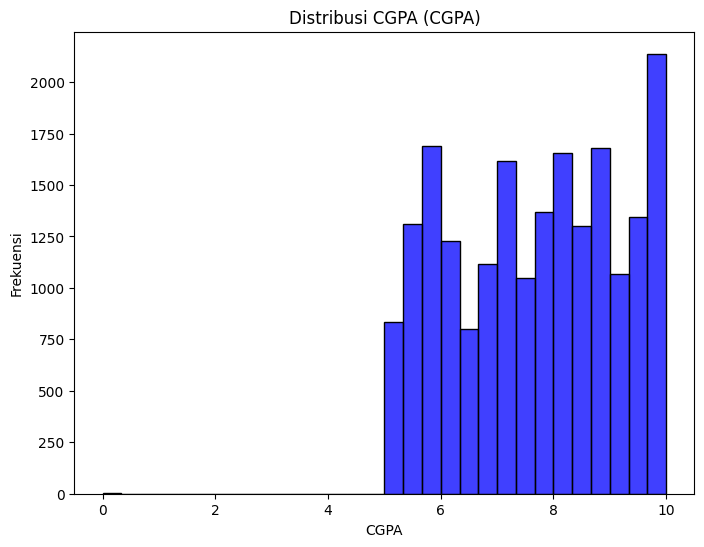

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CGPA'], bins=30, color='blue')
plt.title('Distribusi CGPA (CGPA)')
plt.xlabel('CGPA')
plt.ylabel('Frekuensi')
plt.show()

## **Distribusi	Depression**

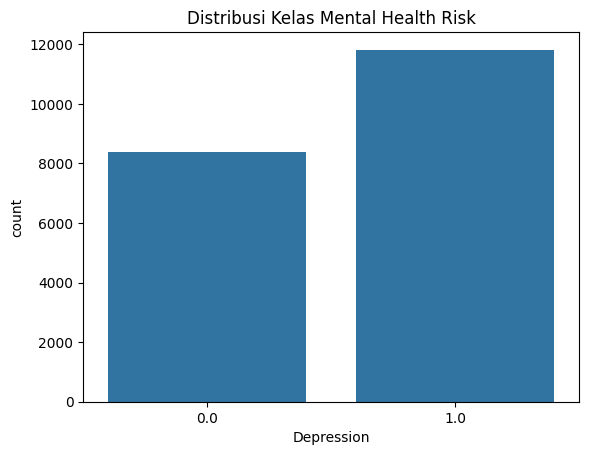

In [ ]:
sns.countplot(x='Depression', data=df)
plt.title('Distribusi Kelas Mental Health Risk')
plt.show()

## **Outlier**

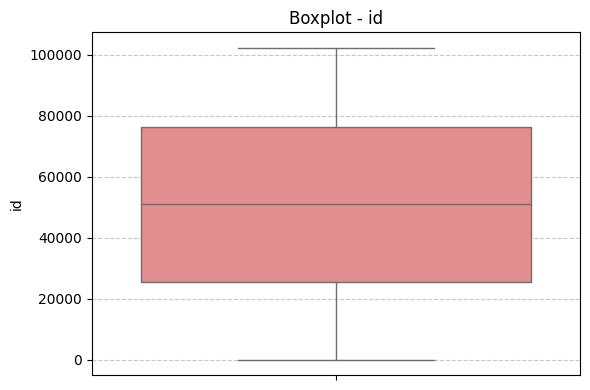

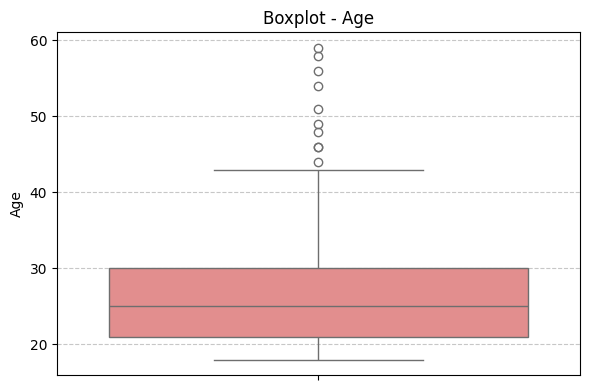

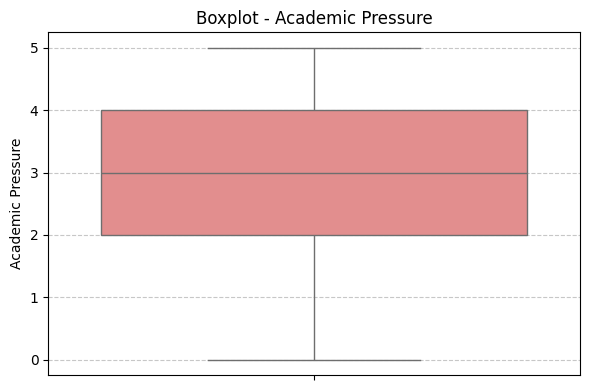

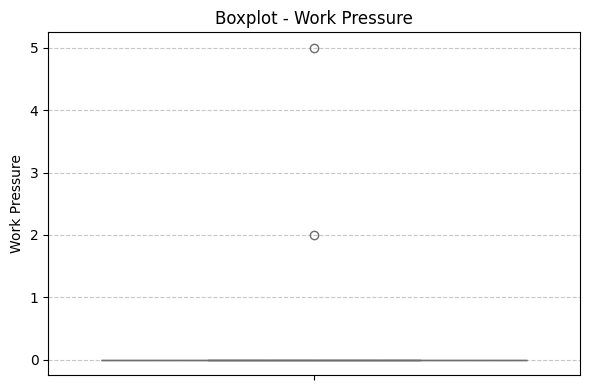

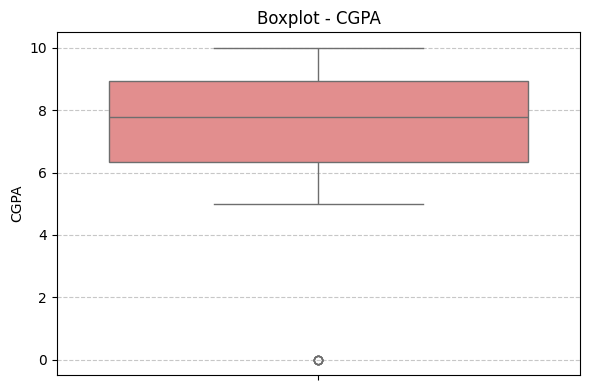

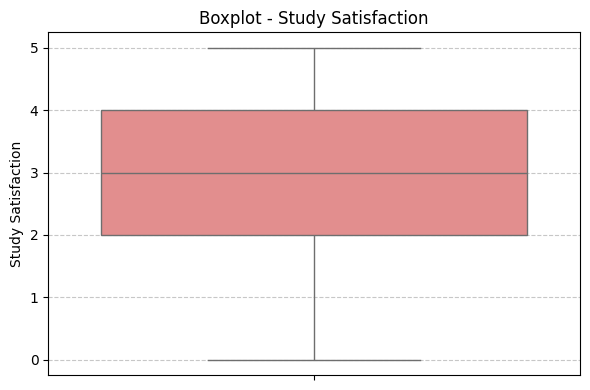

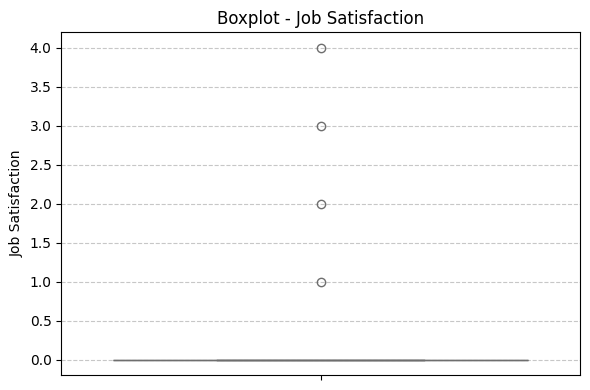

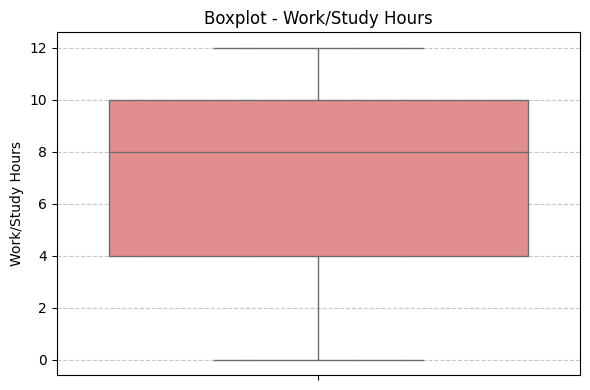

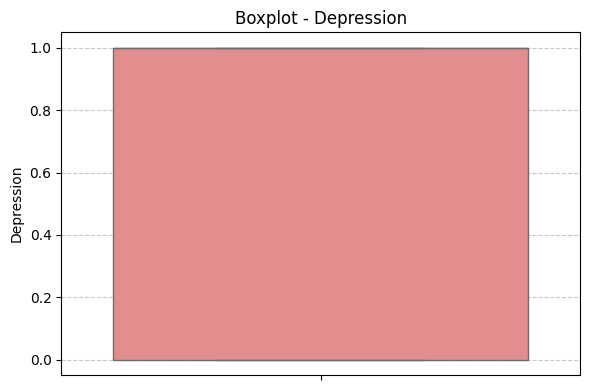

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil hanya kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop untuk buat boxplot per kolom
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot - {col}')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## **Correlation Distribution**

### Numeric

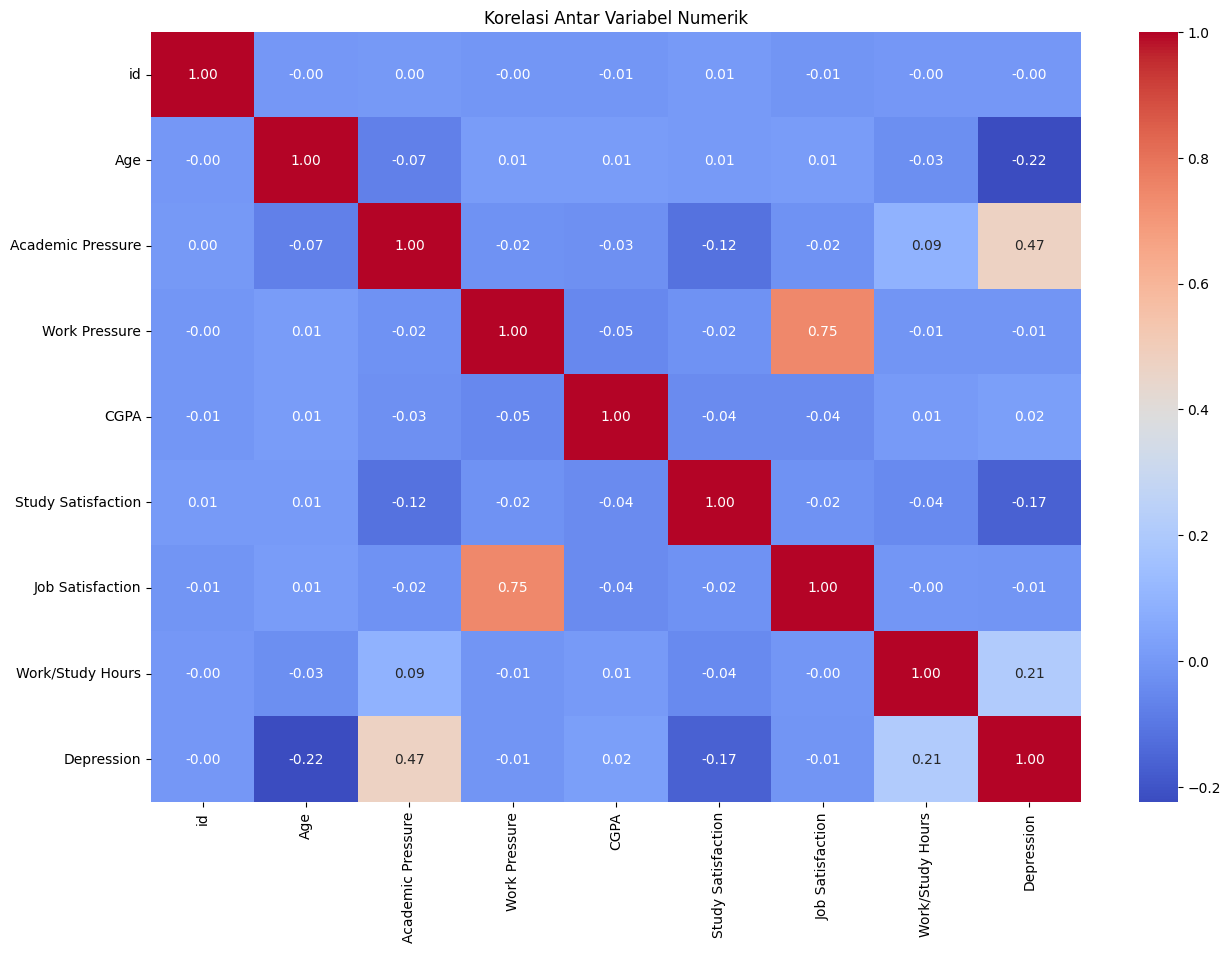

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            fmt='.2f',
            cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

### Categorical

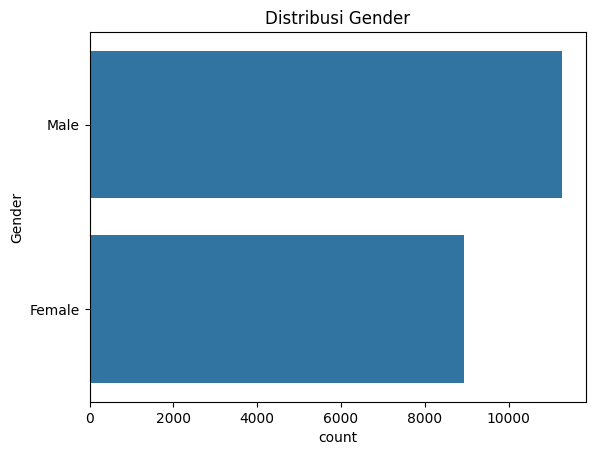

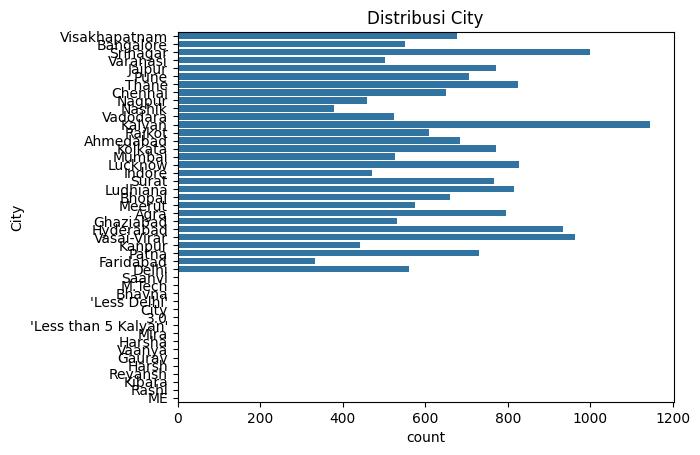

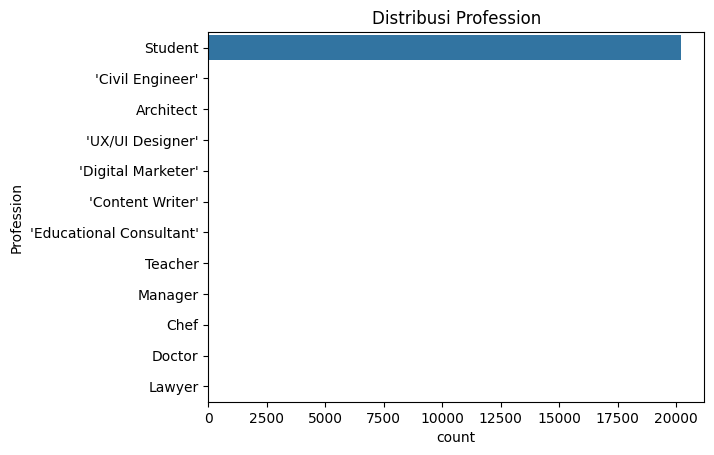

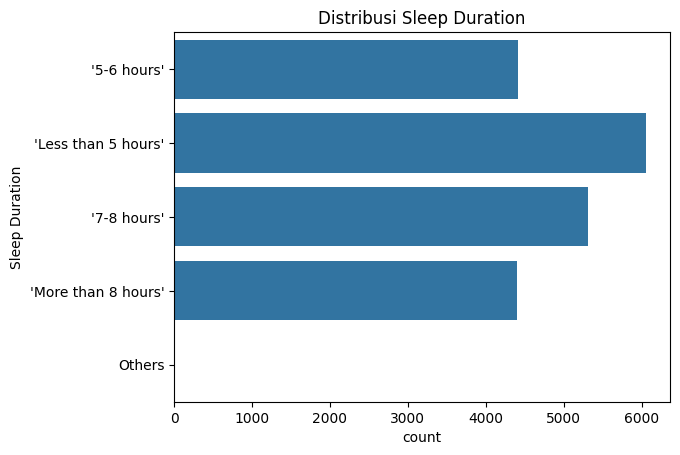

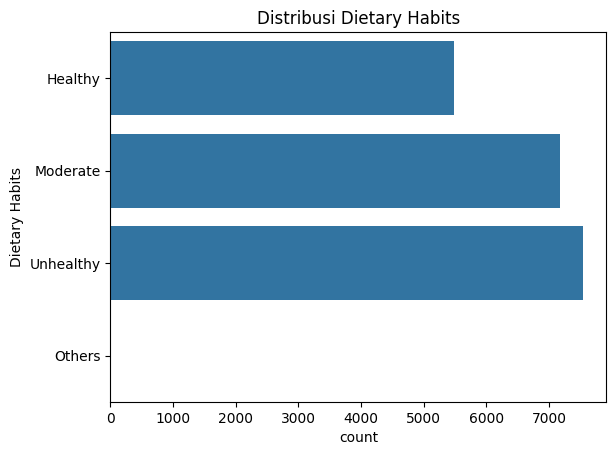

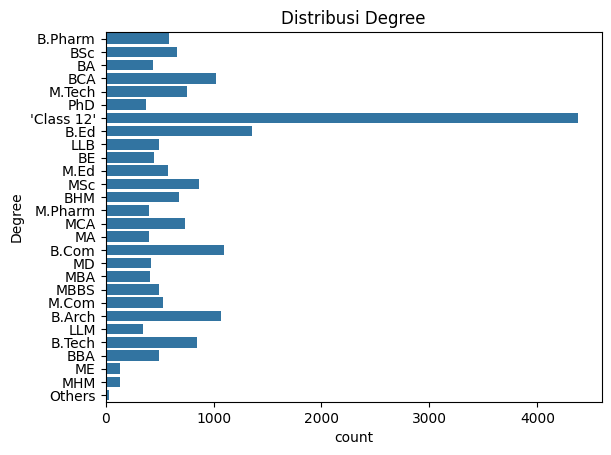

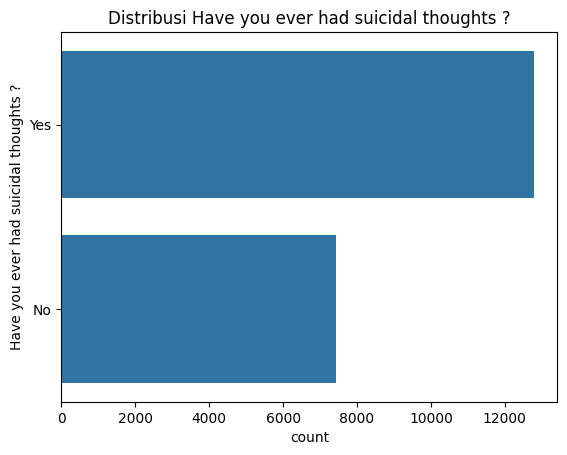

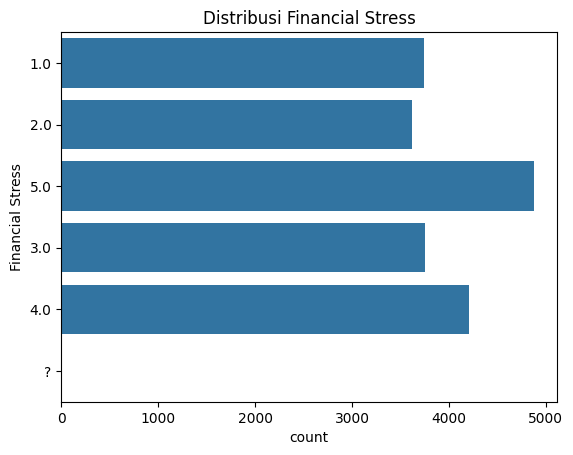

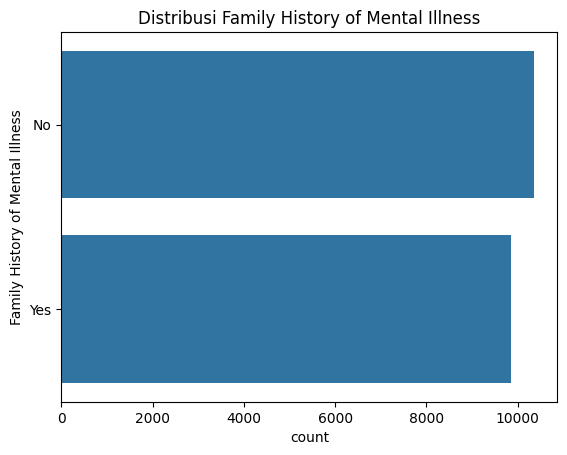

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    plt.figure()
    sns.countplot(y=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **Menghapus atau Menangani Data Kosong (Missing Values)**

Bedasarkan pengecekan pada data understanding, bahwa belum perlu mengisi nilai kosong.

## **Menghapus Data Duplikat**

Bedasarkan pengecekan pada data understanding, bahwa data yang terduplikat tidak ada, tidak perlu ada tindakan.

## **Deteksi dan Penanganan Outlier**

## **Encoding Data Kategorikal**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Daftar kolom kategorikal
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Dictionary untuk menyimpan LabelEncoder tiap kolom
label_encoders = {}

# Looping setiap kolom kategorikal
for col in categorical_cols:
    if col in df.columns:
        # Cek dan tangani nilai kosong (jika ada)
        if df[col].isnull().any():
            df[col] = df[col].fillna('Unknown')  # atau gunakan strategi lain

        # Buat dan simpan encoder
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # Pastikan data berupa string
        label_encoders[col] = le
    else:
        print(f"Kolom '{col}' tidak ditemukan di DataFrame.")


## **Normalisasi atau Standarisasi Fitur**

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## **Save Dataset Preprocessing**

In [ ]:
df.to_csv('student_depression_preprocessing.csv', index=False)